# Heat Map

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. The seaborn python package allows the creation of annotated heatmaps which can be tweaked using Matplotlib tools as per the creator’s requirement.

Here, I have used twitter data about the frequency of tweets between January 2017 and September 2020 for 2020 american presidential election candidates Joe Biden and Donal Trump. This data can be found [here](https://www.kaggle.com/sgwood/biden-and-trump-tweets-201720). We start by importing all of the required libraries into the notebook.

In [9]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
#installing seaborn beacase of lack of default istallation
!pip install seaborn
import seaborn as sns

     |████████████████████████████████| 285 kB 716 kB/s eta 0:00:01
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


Storing the data into a dataframe and taking a look at the imported data.

In [4]:
data_url = "https://bit.ly/3cngqgL" # or "path/to/biden_trump_tweets.csv"
df = pd.read_csv(data_url, 
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )
df.head()

,id,username,date_utc,hour_utc,minute_utc,retweets
0,815422340540547073,realDonaldTrump,2017-01-01 05:00:10+00:00,5,0,27134
1,815930688889352192,realDonaldTrump,2017-01-02 14:40:10+00:00,14,40,23930
2,815973752785793024,realDonaldTrump,2017-01-02 17:31:17+00:00,17,31,14119
3,815989154555297792,realDonaldTrump,2017-01-02 18:32:29+00:00,18,32,3193
4,815990335318982656,realDonaldTrump,2017-01-02 18:37:10+00:00,18,37,7337


We now group the data and extract the relevant tweet information for the first candidate (now president!) Joe Biden.

In [5]:
g = df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot(index='hour_utc', columns='minute_utc', values='id')
# taking a look at a part of the data frame
jb_tweet_cnt.iloc[:10,:9]

minute_utc,0,1,2,3,4,5,6,7,8
hour_utc,,,,,,,,,
0,26.0,16.0,6.0,7.0,4.0,24.0,2.0,2.0,9.0
1,24.0,7.0,5.0,6.0,4.0,19.0,1.0,2.0,6.0
2,3.0,3.0,3.0,NaN,5.0,1.0,4.0,8.0,NaN
3,3.0,3.0,3.0,4.0,5.0,1.0,3.0,5.0,4.0
4,1.0,1.0,1.0,2.0,NaN,NaN,1.0,1.0,1.0
5,1.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,7.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
11,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Adressing the null values and putting in substitutes for both the candidates in the following two code cells.

In [6]:
jb_tweet_cnt.fillna(0, inplace=True)
# Ensure all hours in table
jb_tweet_cnt = jb_tweet_cnt.reindex(range(0,24), axis=0, fill_value=0)
# Ensure all minutes in table
jb_tweet_cnt = jb_tweet_cnt.reindex(range(0,60), axis=1, fill_value=0).astype(int) 

In [7]:
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot(index='hour_utc', columns='minute_utc', values='id')
dt_tweet_cnt.fillna(0, inplace=True)
dt_tweet_cnt = dt_tweet_cnt.reindex(range(0,24), axis=0, fill_value=0)
dt_tweet_cnt = dt_tweet_cnt.reindex(range(0,60), axis=1, fill_value=0).astype(int)

Plotting the heatmaps.

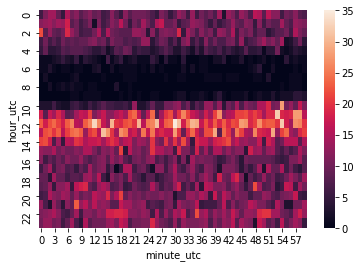

In [18]:
sns.heatmap(dt_tweet_cnt)
plt.show()

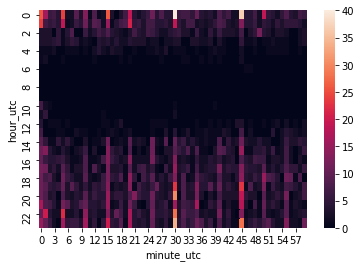

In [19]:
sns.heatmap(jb_tweet_cnt)
plt.show()

#### And there you have it. A heat-map you plotted on your own! What do these heat maps tell us in a glance? Tweeting more is not always a good thing. 

<center> <img src="win.jpg">

This notebook was insired by the following article https://stackabuse.com/ultimate-guide-to-heatmaps-in-seaborn-with-python/